In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib notebook


In [3]:
dataset = pd.read_csv("Admission_Predict.csv")
dataset.head(10)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [4]:
# X=dataset[['Gre Score','CGPA']]
def make_X_mat(dataset):       
    X = []
    for i in range(len(dataset)):                            
        X.append([1])
        X[i]+=(dataset[i])                         
    return np.matrix(X)                             

In [26]:
k=np.random.rand(5,2)
k.T


array([[0.90594087, 0.38739895, 0.98037396, 0.12411847, 0.09247517],
       [0.12359679, 0.11014866, 0.66448765, 0.09065531, 0.59963189]])

In [27]:
def get_Theta(X,Y):
    XT = X.T
    XTX_inv = np.dot(XT,X).I
    return np.dot(XTX_inv , np.dot(XT,Y))     #THETA=(INVERSE(XT*X))*(XT*Y)

In [28]:
def predict(X,theta):
    return(np.dot(X,theta))

In [30]:
full_data=dataset[['GRE Score','CGPA']].values.tolist()
print(full_data)     #FULL DATA WITH GRE Score and CGPA column

[[337.0, 9.65], [324.0, 8.87], [316.0, 8.0], [322.0, 8.67], [314.0, 8.21], [330.0, 9.34], [321.0, 8.2], [308.0, 7.9], [302.0, 8.0], [323.0, 8.6], [325.0, 8.4], [327.0, 9.0], [328.0, 9.1], [307.0, 8.0], [311.0, 8.2], [314.0, 8.3], [317.0, 8.7], [319.0, 8.0], [318.0, 8.8], [303.0, 8.5], [312.0, 7.9], [325.0, 8.4], [328.0, 9.5], [334.0, 9.7], [336.0, 9.8], [340.0, 9.6], [322.0, 8.8], [298.0, 7.5], [295.0, 7.2], [310.0, 7.3], [300.0, 8.1], [327.0, 8.3], [338.0, 9.4], [340.0, 9.6], [331.0, 9.8], [320.0, 9.2], [299.0, 8.4], [300.0, 7.8], [304.0, 7.5], [307.0, 7.7], [308.0, 8.0], [316.0, 8.2], [313.0, 8.5], [332.0, 9.1], [326.0, 9.4], [322.0, 9.1], [329.0, 9.3], [339.0, 9.7], [321.0, 8.85], [327.0, 8.4], [313.0, 8.3], [312.0, 7.9], [334.0, 8.0], [324.0, 8.1], [322.0, 8.0], [320.0, 7.7], [316.0, 7.4], [298.0, 7.6], [300.0, 6.8], [311.0, 8.3], [309.0, 8.1], [307.0, 8.2], [304.0, 8.2], [315.0, 8.5], [325.0, 8.7], [325.0, 8.92], [327.0, 9.02], [316.0, 8.64], [318.0, 9.22], [328.0, 9.16], [332.0, 

In [31]:
X=make_X_mat(full_data)

In [ ]:
X

matrix([[  1.  , 337.  ,   9.65],
        [  1.  , 324.  ,   8.87],
        [  1.  , 316.  ,   8.  ],
        ...,
        [  1.  , 330.  ,   9.45],
        [  1.  , 312.  ,   8.78],
        [  1.  , 333.  ,   9.66]])

In [ ]:
Y = np.matrix(dataset)[:,-1]
Y

In [34]:
X_train=X[0:320,:]
X_test=X[320:,:]
Y_train=Y[0:320,:]
Y_test=Y[320:,:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(320, 3)
(80, 3)
(320, 1)
(80, 1)


In [35]:
theta =get_Theta(X_train,Y_train)
print(theta)     

[[-1.59012271]
 [ 0.00286872]
 [ 0.16313997]]


In [36]:
yhat_test = predict(X_test,theta)
yh_test=yhat_test.flatten()

In [37]:
Y_testactual=np.array(Y_test)
Ytest_pred=np.array(yhat_test)

In [38]:
df = pd.DataFrame({'Actual': Y_testactual.flatten(), 'Predicted': Ytest_pred.flatten()})
df

,Actual,Predicted
0,0.75,0.705952
1,0.73,0.713376
2,0.72,0.659823
3,0.62,0.619322
4,0.67,0.672481
...,...,...
75,0.82,0.814128
76,0.84,0.828417
77,0.91,0.898228
78,0.67,0.737287


In [39]:
%matplotlib inline

(2, 50)
(2, 50)


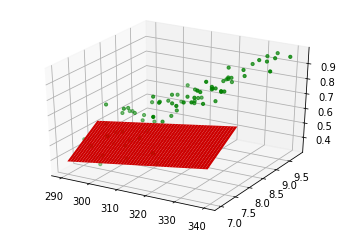

In [42]:

plt3d = plt.figure().gca(projection = '3d')
X1 = np.array(X_test[:,1])
X2 = np.array(X_test[:,2])
plt3d.scatter(np.array(X_test[:,1]),np.array(X_test[:,2]),np.array(Y_test[:,0]),color = 'g',s=10)

i=int(min(X1)[0])
j=int(max(X1)[0])
k=int(min(X2)[0])
l=int(max(X2)[0])
xx1 , xx2 = np.meshgrid(range(i,j),range(k,l))
print(xx1.shape)
print(xx2.shape)

plt3d.plot_surface(xx1,xx2,np.array(theta[0,0]+theta[1,0]*xx1+theta[2,0]*xx2),color = 'r')


In [54]:
epsilon = Y_test-yhat_test
epsilon

matrix([[ 0.04404825],
        [ 0.01662432],
        [ 0.0601766 ],
        [ 0.00067769],
        [-0.00248052],
        [-0.02617983],
        [ 0.05399242],
        [ 0.1515697 ],
        [ 0.0299194 ],
        [-0.11906194],
        [ 0.03925864],
        [ 0.10325376],
        [ 0.11717733],
        [-0.0082148 ],
        [ 0.01392086],
        [ 0.00158309],
        [-0.03899979],
        [ 0.03277165],
        [ 0.04768232],
        [ 0.0578648 ],
        [ 0.06491745],
        [ 0.01581336],
        [-0.05771687],
        [-0.02116531],
        [ 0.01640248],
        [-0.03852327],
        [-0.058358  ],
        [-0.0450724 ],
        [ 0.11100403],
        [ 0.00056752],
        [ 0.06870172],
        [-0.02663532],
        [ 0.04599193],
        [ 0.0266527 ],
        [ 0.07682885],
        [ 0.08604143],
        [ 0.01131324],
        [ 0.11946317],
        [ 0.14295478],
        [ 0.10236176],
        [ 0.10686504],
        [ 0.00561441],
        [ 0.02471292],
        [ 0

In [47]:
epsilon_T = epsilon.T

In [48]:
RSS = np.dot(epsilon_T,epsilon)

In [49]:
RSS

matrix([[0.32203609]])

In [51]:
eps = np.sqrt(RSS)
eps

matrix([[0.56748224]])

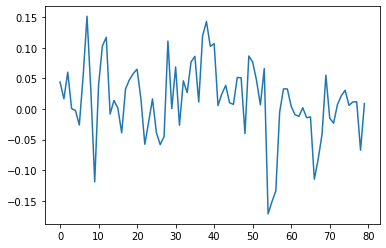

In [53]:
plt1 = plt.figure()
plt.plot(range(80),np.array(epsilon))
plt.show()